In [1]:
import os

In [2]:
!pwd

/home/jovyan/notebooks/analysis/experiment_1


In [3]:
import sys
sys.path.append('/home/jovyan/')

In [4]:
from experiments.reporting.report_repository import ReportRepository
from experiments.slack_client import SlackNotifier
from neat.neat_logger import get_neat_logger
from neat.population_engine import EvolutionEngine
from neat.reporting.reports_pyneat import EvolutionReport
from neat.utils import timeit
import math
import random
from itertools import count
import numpy as np

from experiments.logger import logger
from experiments.slack_client import Notifier
from experiments.object_repository.object_repository import ObjectRepository
from experiments.reporting.report_repository import ReportPathFactory
from neat.configuration import get_configuration
from neat.evaluation.evaluation_engine import EvaluationStochasticEngine
from neat.evolution_operators.crossover import Crossover
from neat.evolution_operators.mutation import Mutation
from neat.genome import Genome
from neat.reporting.reports_pyneat import EvolutionReport
from neat.species import SpeciationEngine
from neat.stagnation import Stagnation
from neat.population_engine import PopulationEngine
from neat.utils import timeit
import neat
import tests
from config_files.configuration_utils import create_configuration
from neat.configuration import get_configuration, set_configuration
from neat.evaluation.evaluation_engine import get_dataset
from neat.evaluation.evaluate_simple import evaluate_genome, calculate_prediction_distribution
from neat.genome import Genome
from neat.evolution_operators.backprop_mutation import BackPropMutation
import os
from neat.loss.vi_loss import get_loss
import torch
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from neat.analysis.experiment_data import ExperimentDataNE, ExperimentDataNAS
from neat.analysis.uncertainty.predictive_distribution import PredictionDistributionEstimator
from neat.analysis.plotting.plot_losses import plot_loss_distribution
from neat.analysis.plotting.plot_classification_metrics import plot_metrics_by_quantile_several_executions
from neat.analysis.experiment_predictive_distributions import ExecutionsPredictionDistributions

In [7]:
from scipy import stats
def filter_data(data, filter_noisy=False, z_score=3):
    if z_score > 0:
        chunks = []
        for _, df in data.groupby(['method', 'label_noise']):
    #         df[(np.abs(stats.zscore(df['f1'])) < 3).all(axis=1)]
            df = df.loc[np.abs(stats.zscore(df['f1'])) < z_score]
            chunks.append(df)
        data = pd.concat(chunks)
        
    if filter_noisy:
        data = data.loc[(data['noise'] == 0) &
               (data['label_noise'] == 0)]
    
    
    return data

In [8]:
LOGS_PATH = f'{os.getcwd()}/'
logger = get_neat_logger(path=LOGS_PATH)

In [22]:
config_versions = {'NE': {'project': 'neuro-evolution',
                         'algorithm_version': 'bayes-neat'},
                  'NAS': {'project': 'nas',
                         'algorithm_version': 'nas'}
                  }

version = 'NE'
n_samples = 1000
datasets = ['iris', 'wine', 'breast_cancer', 'titanic', 'spambase', 'mnist_downsampled']

random_guessing = {'iris': 0.3333,
                  'wine': 0.3333,
                  'breast_cancer': 0.5,
                  'titanic': 0.5,
                  'spambase': 0.5,
                  'mnist_downsampled': 0.1}

In [18]:
experiment_data_by_dataset = {}
data_chunks = []
for dataset in datasets:
    print(dataset)
    correlation_id = f'bayesian_neat_ft_final_v1_{dataset}'
    experiment_data = ExperimentDataNE(correlation_ids=[correlation_id], dataset_name=dataset, n_samples=n_samples,
                                               project=config_versions[version]['project'], 
                                               algorithm_version=config_versions[version]['algorithm_version'],
                                               keep_top=1.0, filter_checkpoint_finish=True)\
                                .process_data()
    data = experiment_data.get_experiment_data()
    data['dataset'] = dataset
    data_chunks.append(data)
    experiment_data_by_dataset[dataset] = experiment_data
data = pd.concat(data_chunks)

iris
###########
CORRELATION ID: bayesian_neat_ft_final_v1_iris
Train percentage: 0.75
Random state: 52
Sum Train: -41.176780700683594
Label Noise: 0.0
Sum of 10 first labels: 7
[2 1 0 1 1 0 1 0 0 1]
Training: 112. Testing: 38
Train percentage: 0.75
Random state: 52
Sum Train: -41.176780700683594
Label Noise: 0.0
Sum of 10 first labels: 7
[2 1 0 1 1 0 1 0 0 1]
Training: 112. Testing: 38


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Train percentage: 0.75
Random state: 82
Sum Train: 0.3260765075683594
Label Noise: 0.0
Sum of 10 first labels: 13
[1 0 2 1 2 2 0 2 2 1]
Training: 112. Testing: 38
Train percentage: 0.75
Random state: 82
Sum Train: 0.3260765075683594
Label Noise: 0.0
Sum of 10 first labels: 13
[1 0 2 1 2 2 0 2 2 1]
Training: 112. Testing: 38


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarn

Train percentage: 0.75
Random state: 83
Sum Train: -16.439117431640625
Label Noise: 0.0
Sum of 10 first labels: 9
[2 0 1 1 1 0 1 0 2 1]
Training: 112. Testing: 38
Train percentage: 0.75
Random state: 83
Sum Train: -16.439117431640625
Label Noise: 0.0
Sum of 10 first labels: 9
[2 0 1 1 1 0 1 0 2 1]
Training: 112. Testing: 38
Train percentage: 0.75
Random state: 33
Sum Train: -32.15251159667969
Label Noise: 0.0
Sum of 10 first labels: 7
[1 0 1 1 1 0 0 1 0 2]
Training: 112. Testing: 38


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarn

Train percentage: 0.75
Random state: 33
Sum Train: -32.15251159667969
Label Noise: 0.0
Sum of 10 first labels: 7
[1 0 1 1 1 0 0 1 0 2]
Training: 112. Testing: 38
Train percentage: 0.75
Random state: 15
Sum Train: -0.34218311309814453
Label Noise: 0.0
Sum of 10 first labels: 9
[0 1 2 0 0 1 2 2 0 1]
Training: 112. Testing: 38
Train percentage: 0.75
Random state: 15
Sum Train: -0.34218311309814453
Label Noise: 0.0
Sum of 10 first labels: 9
[0 1 2 0 0 1 2 2 0 1]
Training: 112. Testing: 38


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


wine
###########
CORRELATION ID: bayesian_neat_ft_final_v1_wine
Train percentage: 0.75
Random state: 54
Sum Train: -34.62544631958008
Label Noise: 0.0
Sum of 10 first labels: 5
[1 1 0 0 0 0 0 2 0 1]
Training: 133. Testing: 45


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Train percentage: 0.75
Random state: 54
Sum Train: -34.62544631958008
Label Noise: 0.0
Sum of 10 first labels: 5
[1 1 0 0 0 0 0 2 0 1]
Training: 133. Testing: 45


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Train percentage: 0.75
Random state: 81
Sum Train: -15.47683334350586
Label Noise: 0.0
Sum of 10 first labels: 5
[0 0 0 1 0 2 0 0 0 2]
Training: 133. Testing: 45


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Train percentage: 0.75
Random state: 81
Sum Train: -15.47683334350586
Label Noise: 0.0
Sum of 10 first labels: 5
[0 0 0 1 0 2 0 0 0 2]
Training: 133. Testing: 45


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Train percentage: 0.75
Random state: 59
Sum Train: 6.2089338302612305
Label Noise: 0.0
Sum of 10 first labels: 8
[0 1 0 1 2 1 0 0 1 2]
Training: 133. Testing: 45


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Train percentage: 0.75
Random state: 59
Sum Train: 6.2089338302612305
Label Noise: 0.0
Sum of 10 first labels: 8
[0 1 0 1 2 1 0 0 1 2]
Training: 133. Testing: 45


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Train percentage: 0.75
Random state: 38
Sum Train: -18.282936096191406
Label Noise: 0.0
Sum of 10 first labels: 12
[1 1 2 2 0 1 0 2 2 1]
Training: 133. Testing: 45
Train percentage: 0.75
Random state: 38
Sum Train: -18.282936096191406
Label Noise: 0.0
Sum of 10 first labels: 12
[1 1 2 2 0 1 0 2 2 1]
Training: 133. Testing: 45


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Train percentage: 0.75
Random state: 79
Sum Train: 8.17223834991455
Label Noise: 0.0
Sum of 10 first labels: 13
[0 2 2 0 2 2 1 2 1 1]
Training: 133. Testing: 45
Train percentage: 0.75
Random state: 79
Sum Train: 8.17223834991455
Label Noise: 0.0
Sum of 10 first labels: 13
[0 2 2 0 2 2 1 2 1 1]
Training: 133. Testing: 45


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


breast_cancer
###########
CORRELATION ID: bayesian_neat_ft_final_v1_breast_cancer
Train percentage: 0.75
Random state: 61
Sum Train: 100.32131958007812
Label Noise: 0.0
Sum of 10 first labels: 5
[0 0 1 0 0 1 1 1 1 0]
Training: 426. Testing: 143
Train percentage: 0.75
Random state: 61
Sum Train: 100.32131958007812
Label Noise: 0.0
Sum of 10 first labels: 5
[0 0 1 0 0 1 1 1 1 0]
Training: 426. Testing: 143
Train percentage: 0.75
Random state: 76
Sum Train: -219.7279815673828
Label Noise: 0.0
Sum of 10 first labels: 6
[0 1 1 0 1 1 1 1 0 0]
Training: 426. Testing: 143
Train percentage: 0.75
Random state: 76
Sum Train: -219.7279815673828
Label Noise: 0.0
Sum of 10 first labels: 6
[0 1 1 0 1 1 1 1 0 0]
Training: 426. Testing: 143
Train percentage: 0.75
Random state: 39
Sum Train: 156.7285614013672
Label Noise: 0.0
Sum of 10 first labels: 6
[0 1 0 1 1 0 0 1 1 1]
Training: 426. Testing: 143
Train percentage: 0.75
Random state: 39
Sum Train: 156.7285614013672
Label Noise: 0.0
Sum of 10 first la

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Train percentage: 0.75
Random state: 34
Sum Train: -6504.005859375
Label Noise: 0.0
Sum of 10 first labels: 45
[7 3 4 9 1 0 8 2 2 9]
Training: 3750. Testing: 1250
Train percentage: 0.75
Random state: 55
Sum Train: -6232.6494140625
Label Noise: 0.0
Sum of 10 first labels: 52
[6 7 6 6 5 2 0 9 9 2]
Training: 3750. Testing: 1250
Train percentage: 0.75
Random state: 55
Sum Train: -6232.6494140625
Label Noise: 0.0
Sum of 10 first labels: 52
[6 7 6 6 5 2 0 9 9 2]
Training: 3750. Testing: 1250
Train percentage: 0.75
Random state: 19
Sum Train: -7265.6689453125
Label Noise: 0.0
Sum of 10 first labels: 57
[2 7 8 3 9 8 4 6 7 3]
Training: 3750. Testing: 1250


In [19]:
data.head()

,correlation_id,execution_id,train_percentage,noise,label_noise,is_bayesian,beta,loss_training,loss_testing,duration,...,n_connections,n_layers,mean_genome_std,accuracy,precision,recall,f1,ece,absolute_best,dataset
0,bayesian_neat_ft_final_v1_iris,0f5a1f1c-048b-4e92-bc72-81b00fa4041d,0.75,0.0,0.0,True,0.0001,0.886597,0.939498,0:08:55.735616,...,20,4,0.574074,71.052632,0.843202,0.710526,0.677742,0.151609,False,iris
0,bayesian_neat_ft_final_v1_iris,0f5a1f1c-048b-4e92-bc72-81b00fa4041d,0.75,0.0,0.0,True,0.0001,0.592720,0.848631,0:08:55.735616,...,30,6,0.955271,97.368421,0.975232,0.973684,0.973557,0.204243,True,iris
0,bayesian_neat_ft_final_v1_iris,52b41ad6-364e-48b6-a76a-6e01b6b34832,0.75,0.0,0.0,True,0.0001,0.911576,0.895239,0:15:11.493692,...,36,8,0.501961,65.789474,0.517943,0.657895,0.558574,0.155242,False,iris
0,bayesian_neat_ft_final_v1_iris,52b41ad6-364e-48b6-a76a-6e01b6b34832,0.75,0.0,0.0,True,0.0001,0.630368,0.926633,0:15:11.493692,...,22,4,0.993848,94.736842,0.956938,0.947368,0.947807,0.228321,True,iris
0,bayesian_neat_ft_final_v1_iris,61b199b2-b8b4-4353-8e4e-3f6313d08c0a,0.75,0.0,0.0,True,0.0001,0.895996,0.903070,0:06:05.313091,...,20,4,0.474074,84.210526,0.867624,0.842105,0.842105,0.184117,False,iris


In [20]:
data['Version'] = 'With Fine-Tuning'
data.loc[data['absolute_best'] == False, 'Version'] = 'Without Fine-Tuning'

In [21]:
data.to_csv('./data_experiment_1.csv', index=False)

----
# Experiment 1

In [39]:
metrics_stats = data.groupby(['dataset', 'Version']).agg({'f1': [np.mean, np.median, np.std],
                                         'accuracy': [np.mean, np.median, np.std],
                                         'loss_training': [np.mean, np.median, np.std],
                                         'loss_testing': [np.mean, np.std]})
metrics_stats

f1                      \
                                           mean    median       std   
dataset           Version                                             
breast_cancer     With Fine-Tuning     0.963626  0.964874  0.005769   
                  Without Fine-Tuning  0.960802  0.958247  0.011816   
iris              With Fine-Tuning     0.952807  0.947807  0.021887   
                  Without Fine-Tuning  0.601136  0.561404  0.175130   
mnist_downsampled With Fine-Tuning     0.608459  0.608459  0.118937   
                  Without Fine-Tuning  0.323383  0.323383  0.005634   
spambase          With Fine-Tuning     0.879878  0.895091  0.032476   
                  Without Fine-Tuning  0.846085  0.852457  0.024950   
titanic           With Fine-Tuning     0.780844  0.777024  0.025079   
                  Without Fine-Tuning  0.778648  0.776618  0.025101   
wine              With Fine-Tuning     0.969041  0.977964  0.037330   
                  Without Fine-Tuning  0.973570  0.977749  0.018364   

                                        accuracy                        \
                                            mean     median        std   
dataset           Version                                                
breast_cancer     With Fine-Tuning     96.363636  96.503497   0.585077   
                  Without Fine-Tuning  96.083916  95.804196   1.170154   
iris              With Fine-Tuning     95.263158  94.736842   2.201737   
                  Without Fine-Tuning  67.368421  65.789474  12.286966   
mnist_downsampled With Fine-Tuning     63.200000  63.200000   9.050967   
                  Without Fine-Tuning  38.520000  38.520000   1.414214   
spambase          With Fine-Tuning     88.132059  89.574283   3.078824   
                  Without Fine-Tuning  84.813206  85.317116   2.309629   
titanic           With Fine-Tuning     78.625954  77.862595   2.241859   
                  Without Fine-Tuning  78.396947  77.862595   2.169202   
wine              With Fine-Tuning     96.888889  97.777778   3.718489   
                  Without Fine-Tuning  97.333333  97.777778   1.859245   

                                      loss_training                      \
                                               mean    median       std   
dataset           Version                                                 
breast_cancer     With Fine-Tuning         0.369603  0.370028  0.009810   
                  Without Fine-Tuning      0.386794  0.386998  0.006227   
iris              With Fine-Tuning         0.599088  0.592720  0.018368   
                  Without Fine-Tuning      0.885162  0.886597  0.022746   
mnist_downsampled With Fine-Tuning         1.908603  1.908603  0.070308   
                  Without Fine-Tuning      2.181421  2.181421  0.005300   
spambase          With Fine-Tuning         0.488217  0.488818  0.010058   
                  Without Fine-Tuning      0.496322  0.496977  0.013894   
titanic           With Fine-Tuning         0.499358  0.500208  0.011016   
                  Without Fine-Tuning      0.530425  0.531644  0.004279   
wine              With Fine-Tuning         0.642262  0.641510  0.015049   
                  Without Fine-Tuning      0.676358  0.673516  0.020653   

                                      loss_testing            
                                              mean       std  
dataset           Version                                     
breast_cancer     With Fine-Tuning        0.399248  0.010211  
                  Without Fine-Tuning     0.398751  0.008873  
iris              With Fine-Tuning        0.853752  0.073245  
                  Without Fine-Tuning     0.911086  0.018647  
mnist_downsampled With Fine-Tuning        2.235857  0.008242  
                  Without Fine-Tuning     2.182852  0.004133  
spambase          With Fine-Tuning        0.500297  0.022306  
                  Without Fine-Tuning     0.494679  0.020728  
titanic           With Fine-Tuning        0.54089

In [45]:
loss_training = metrics_stats['loss_training'].reset_index()
loss_training

,dataset,Version,mean,median,std
0,breast_cancer,With Fine-Tuning,0.369603,0.370028,0.009810
1,breast_cancer,Without Fine-Tuning,0.386794,0.386998,0.006227
2,iris,With Fine-Tuning,0.599088,0.592720,0.018368
3,iris,Without Fine-Tuning,0.885162,0.886597,0.022746
4,mnist_downsampled,With Fine-Tuning,1.908603,1.908603,0.070308
5,mnist_downsampled,Without Fine-Tuning,2.181421,2.181421,0.005300
6,spambase,With Fine-Tuning,0.488217,0.488818,0.010058
7,spambase,Without Fine-Tuning,0.496322,0.496977,0.013894
8,titanic,With Fine-Tuning,0.499358,0.500208,0.011016
9,titanic,Without Fine-Tuning,0.530425,0.531644,0.004279


In [55]:
loss_train_pivot = pd.pivot_table(data=loss_training.drop(columns=['std', 'median']), index=['dataset'], values=['mean'], columns=['Version'])['mean'].reset_index()
loss_train_pivot[['dataset', 'Without Fine-Tuning', 'With Fine-Tuning']].to_latex('table.txt')

In [30]:
# n_datasets = len(data['dataset'].unique())
# _, axes = plt.subplots(n_datasets, 2, figsize=(15, 3 * n_datasets))

# for i, (dataset, data_dataset) in enumerate(data.groupby('dataset')):
#     ax1 = axes[i, 0]; ax2 = axes[i, 1]
#     sns.boxplot(data=data_dataset, x='Version', y='f1', ax=ax1)
#     sns.boxplot(data=data_dataset, x='Version', y='accuracy', ax=ax2)
#     ax1.set_ylim([0, 1])
#     ax1.axhline(random_guessing[dataset])
#     ax2.set_ylim([0, 100])
#     ax2.axhline(random_guessing[dataset]*100)


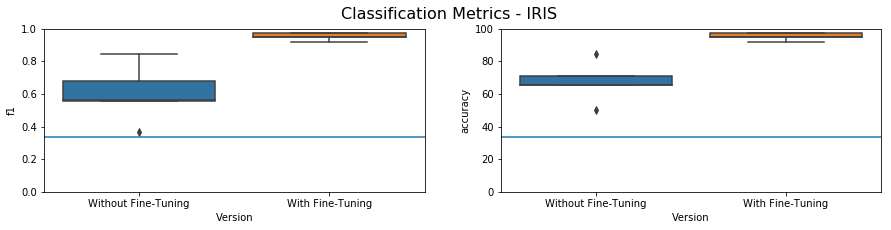

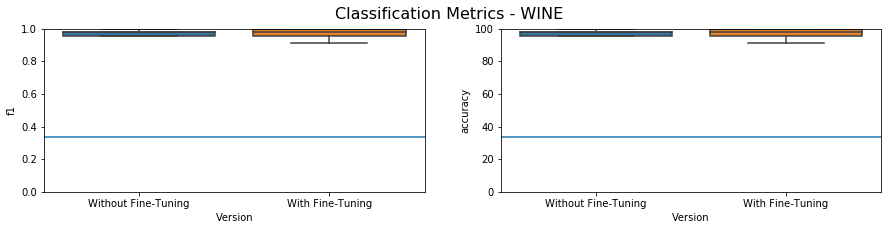

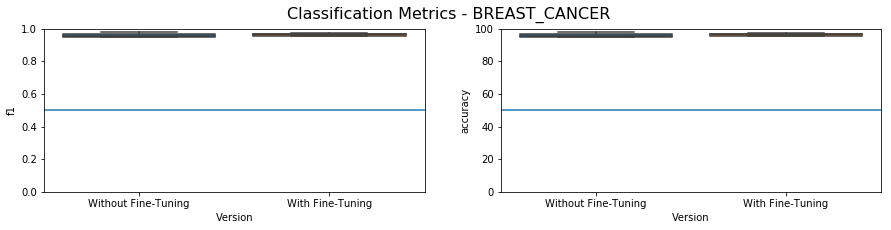

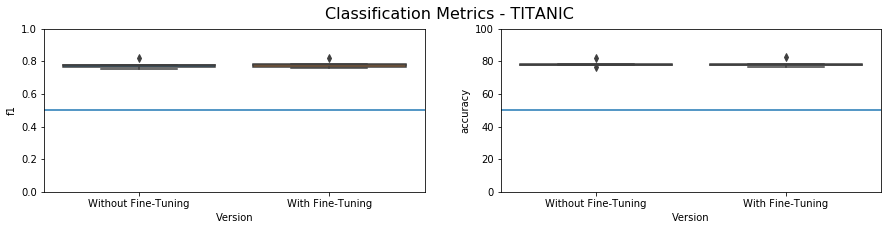

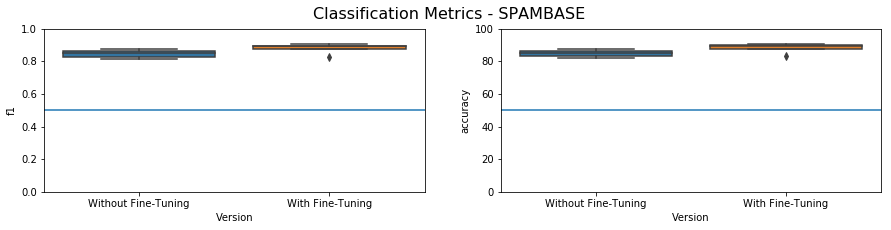

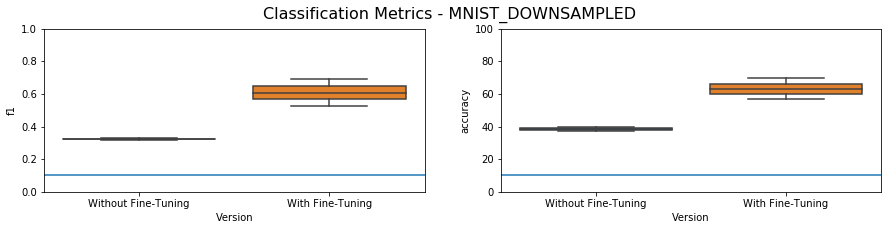

In [36]:
n_datasets = len(data['dataset'].unique())

# for i, (dataset, data_dataset) in enumerate(data.groupby('dataset')):
for i, dataset in enumerate(datasets):
    data_dataset = data.loc[data['dataset'] == dataset]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
    fig.suptitle(f'Classification Metrics - {dataset.upper()}', fontsize=16)

    sns.boxplot(data=data_dataset, x='Version', y='f1', ax=ax1)
    sns.boxplot(data=data_dataset, x='Version', y='accuracy', ax=ax2)
    ax1.set_ylim([0, 1])
    ax1.axhline(random_guessing[dataset])
    ax2.set_ylim([0, 100])
    ax2.axhline(random_guessing[dataset]*100)
#     fig.title(f'Classification Metrics - {dataset.upper()}')
    plt.show()